<a href="https://colab.research.google.com/github/PRAKASHMS7/Phishing-Detection-By-Using-ML-Models/blob/main/Wrapper_Based_Approach/FORWARD_SELECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FORWARD SELECTED FEATURES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score

# Load the dataset
data = pd.read_csv('/content/All.csv')

# List of forward-selected features
forward_selected_features = [
    'Querylength', 'path_token_count', 'avgpathtokenlen', 'charcompvowels', 'ldl_url', 'dld_path',
    'dld_getArg', 'pathLength', 'this.fileExtLen', 'ArgUrlRatio', 'argDomanRatio', 'argPathRatio',
    'LongestVariableValue', 'URL_DigitCount', 'Query_DigitCount', 'Directory_LetterCount',
    'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength',
    'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength', 'URLQueries_variable', 'spcharUrl',
    'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 'NumberRate_URL', 'NumberRate_Extension',
    'NumberRate_AfterPath', 'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension',
    'SymbolCount_Afterpath', 'Entropy_URL', 'Entropy_Domain', 'Entropy_DirectoryName', 'Entropy_Filename',
    'Entropy_Extension'
]

# Check if the features exist in the dataset
available_features = [feature for feature in forward_selected_features if feature in data.columns]

# Define X (features) and y (target)
X = data[available_features]
y = data['URL_Type_obf_Type']  # Ensure this is your actual target column

# Handle missing values by imputing with the mean
X = X.fillna(X.mean())

# Replace infinite values with NaN, then fill with column mean
X = X.replace([float('inf'), float('-inf')], float('nan'))
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy of the Model with forward Selected Features: {accuracy * 100:.2f}%")
print(f"Overall Precision: {precision * 100:.2f}%")
print(f"Overall F1 Score: {f1 * 100:.2f}%\n")
print("Classification Report:")
print(report)


Accuracy of the Model with forward Selected Features: 71.75%
Overall Precision: 71.57%
Overall F1 Score: 71.41%

Classification Report:
              precision    recall  f1-score   support

  Defacement       0.77      0.78      0.78      1628
      benign       0.73      0.76      0.74      1526
     malware       0.60      0.51      0.55      1332
    phishing       0.70      0.83      0.76      1497
        spam       0.76      0.67      0.71      1359

    accuracy                           0.72      7342
   macro avg       0.71      0.71      0.71      7342
weighted avg       0.72      0.72      0.71      7342



BACKWARD SELECTED FEATURES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score

# Load the dataset
data = pd.read_csv('/content/All.csv')
# List of backward-selected features
backward_selected_features = [
    'Querylength', 'path_token_count', 'avgpathtokenlen', 'tld', 'dld_path', 'dld_getArg', 'urlLen',
    'domainlength', 'subDirLen', 'this.fileExtLen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio',
    'domainUrlRatio', 'NumberofDotsinURL', 'LongestVariableValue', 'URL_DigitCount', 'URL_Letter_Count',
    'Directory_LetterCount', 'Filename_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
    'Domain_LongestWordLength', 'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
    'URLQueries_variable', 'spcharUrl', 'delimeter_path', 'delimeter_Count', 'NumberRate_URL',
    'NumberRate_Domain', 'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_Directoryname',
    'SymbolCount_FileName', 'SymbolCount_Extension', 'Entropy_URL', 'Entropy_Filename', 'Entropy_Extension'
]

# Check if the features exist in the dataset
available_features = [feature for feature in backward_selected_features if feature in data.columns]

# Define X (features) and y (target)
X = data[available_features]
y = data['URL_Type_obf_Type']  # Ensure this is your actual target column

# Handle missing values by imputing with the mean
X = X.fillna(X.mean())

# Replace infinite values with NaN, then fill with column mean
X = X.replace([float('inf'), float('-inf')], float('nan'))
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy of the Model with backward Selected Features: {accuracy * 100:.2f}%")
print(f"Overall Precision: {precision * 100:.2f}%")
print(f"Overall F1 Score: {f1 * 100:.2f}%\n")
print("Classification Report:")
print(report)


Accuracy of the Model with backward Selected Features: 76.21%
Overall Precision: 76.09%
Overall F1 Score: 76.00%

Classification Report:
              precision    recall  f1-score   support

  Defacement       0.79      0.76      0.77      1628
      benign       0.78      0.86      0.82      1526
     malware       0.68      0.60      0.64      1332
    phishing       0.74      0.82      0.78      1497
        spam       0.80      0.76      0.78      1359

    accuracy                           0.76      7342
   macro avg       0.76      0.76      0.76      7342
weighted avg       0.76      0.76      0.76      7342



UNION SELECTED FEATURES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score

# Load the dataset
data = pd.read_csv('/content/All.csv')

# Union of features from both lists
union_features = [
    'Querylength', 'path_token_count', 'avgpathtokenlen', 'charcompvowels', 'ldl_url', 'dld_path',
    'dld_getArg', 'pathLength', 'this.fileExtLen', 'ArgUrlRatio', 'argDomanRatio', 'argPathRatio',
    'LongestVariableValue', 'URL_DigitCount', 'Query_DigitCount', 'Directory_LetterCount',
    'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength',
    'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength', 'URLQueries_variable',
    'spcharUrl', 'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 'NumberRate_URL',
    'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_Directoryname', 'SymbolCount_FileName',
    'SymbolCount_Extension', 'SymbolCount_Afterpath', 'Entropy_URL', 'Entropy_Domain',
    'Entropy_DirectoryName', 'Entropy_Filename', 'Entropy_Extension', 'tld', 'urlLen',
    'domainlength', 'subDirLen', 'pathurlRatio', 'domainUrlRatio', 'NumberofDotsinURL',
    'URL_Letter_Count', 'Filename_LetterCount', 'NumberRate_Domain'
]

# Check if the features exist in the dataset
available_features = [feature for feature in union_features if feature in data.columns]

# Define X (features) and y (target)
X = data[available_features]
y = data['URL_Type_obf_Type']  # Ensure this is your actual target column

# Handle missing values by imputing with the mean
X = X.fillna(X.mean())

# Replace infinite values with NaN, then fill with column mean
X = X.replace([float('inf'), float('-inf')], float('nan'))
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy of the Model with Union of Selected Features: {accuracy * 100:.2f}%")
print(f"Overall Precision: {precision * 100:.2f}%")
print(f"Overall F1 Score: {f1 * 100:.2f}%\n")
print("Classification Report:")
print(report)


Accuracy of the Model with Union of Selected Features: 78.87%
Overall Precision: 78.80%
Overall F1 Score: 78.74%

Classification Report:
              precision    recall  f1-score   support

  Defacement       0.83      0.80      0.81      1628
      benign       0.79      0.87      0.83      1526
     malware       0.70      0.63      0.67      1332
    phishing       0.77      0.81      0.79      1497
        spam       0.84      0.81      0.82      1359

    accuracy                           0.79      7342
   macro avg       0.79      0.79      0.78      7342
weighted avg       0.79      0.79      0.79      7342



Accuracy of the Model with forward Selected Features: 71.85%
Overall Precision: 71.67%
Overall F1 Score: 71.51%

Classification Report:
              precision    recall  f1-score   support

  Defacement       0.77      0.78      0.78      1628
      benign       0.73      0.76      0.74      1526
     malware       0.61      0.51      0.55      1332
    phishing       0.70      0.83      0.76      1497
        spam       0.76      0.68      0.72      1359

    accuracy                           0.72      7342
   macro avg       0.71      0.71      0.71      7342
weighted avg       0.72      0.72      0.72      7342



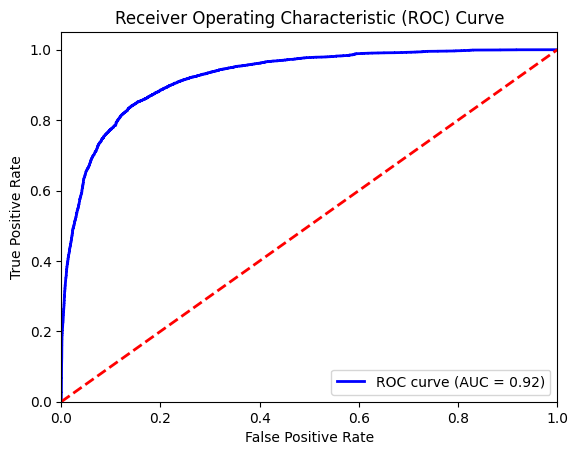

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the dataset
data = pd.read_csv('/content/All.csv')

# List of forward-selected features
forward_selected_features = [
    'Querylength', 'path_token_count', 'avgpathtokenlen', 'charcompvowels', 'ldl_url', 'dld_path',
    'dld_getArg', 'pathLength', 'this.fileExtLen', 'ArgUrlRatio', 'argDomanRatio', 'argPathRatio',
    'LongestVariableValue', 'URL_DigitCount', 'Query_DigitCount', 'Directory_LetterCount',
    'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength',
    'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength', 'URLQueries_variable', 'spcharUrl',
    'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 'NumberRate_URL', 'NumberRate_Extension',
    'NumberRate_AfterPath', 'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension',
    'SymbolCount_Afterpath', 'Entropy_URL', 'Entropy_Domain', 'Entropy_DirectoryName', 'Entropy_Filename',
    'Entropy_Extension'
]

# Check if the features exist in the dataset
available_features = [feature for feature in forward_selected_features if feature in data.columns]

# Define X (features) and y (target)
X = data[available_features]
y = data['URL_Type_obf_Type']  # Ensure this is your actual target column

# Handle missing values by imputing with the mean
X = X.fillna(X.mean())

# Replace infinite values with NaN, then fill with column mean
X = X.replace([float('inf'), float('-inf')], float('nan'))
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=model.classes_)  # Binarize the true labels
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for the overall model by treating all classes as positive
# Get the probabilities of the positive class (1) for all classes
y_prob_positive = y_prob.ravel()  # Flatten the predicted probabilities
y_test_combined = y_test_binarized.ravel()  # Flatten the true labels

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_combined, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Display the results
print(f"Accuracy of the Model with forward Selected Features: {accuracy * 100:.2f}%")
print(f"Overall Precision: {precision * 100:.2f}%")
print(f"Overall F1 Score: {f1 * 100:.2f}%\n")
print("Classification Report:")
print(report)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
